In [17]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
dir = r'./dataset/Datasets/Aposentados2021'#Insira o caminho da pasta com o dado dos aposentados
files = glob.glob(dir + "/*.csv")
df = []
cols = ['Nome','CPF','Matrícula do Servidor','Nome do órgão','Sigla do órgão','Código do órgão superior','Cargo', 'Classe', 'Padrão', 
        'Referência', 'Nível' ,'Tipo de Aposentadoria','Fundamentação da inatividade','Nome Diploma Legal',
        'Data publicação do Diploma Legal','Ocorrência de ingresso no serviço público','Data de ocorrência de ingresso no serviço público ','Rendimento_liq']
for i in range(len(files)):
    df.append(pd.read_csv(files[i], header=None, names=cols,encoding='Latin1' ,sep=';', on_bad_lines = 'skip' ))

df_ap = pd.concat(df) 
df_ap.head()

,Nome,CPF,Matrícula do Servidor,Nome do órgão,Sigla do órgão,Código do órgão superior,Cargo,Classe,Padrão,Referência,Nível,Tipo de Aposentadoria,Fundamentação da inatividade,Nome Diploma Legal,Data publicação do Diploma Legal,Ocorrência de ingresso no serviço público,Data de ocorrência de ingresso no serviço público,Rendimento_liq
0,ALBERTO GONCALVES FERRAZ ...,***203031**,130000023619,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AUX OPERAC DE SERV DIVERSOS,S,III,0,0,VOLUNTARIA,EC103 3Ì EC47 3Ì,"PORT 000143/2020, INMET PUB: DO 31DEZ2020 ...",31122020,ADMISSAO SEM CONCURSO PUBLICO ...,4011982,"3.504,14"
1,LENILZETE CANDIDA DE CAMPOS MELO MARTINS ...,***202201**,130000024133,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,DATILOGRAFO,S,III,0,0,VOLUNTARIA,EC103 3Ì EC47 3Ì,"PORT 000142/2020, 9DISME PUB: DO 31DEZ2020 ...",31122020,ADMISSAO SEM CONCURSO PUBLICO ...,4011982,"4.698,47"
2,JOSE JORGE MOREIRA GOMES ...,***167045**,130000029281,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AGENTE DE ATIVIDADES AGROPECUARIAS,S,IV,0,0,VOLUNTARIA,EC103 3Ì EC47 3Ì,"PORT 000327/2020, SUBES-CEPL PUB: DO 24DEZ2020...",24122020,ADMISSAO POR CONCURSO PUBLICO ...,26111976,"9.461,60"
3,JOSE ROSINALDO ALVES DOS SANTOS ...,***820935**,130000030752,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AGENTE ADMINISTRATIVO,S,III,0,0,VOLUNTARIA,EC103 3Ì EC47 3Ì,"PORT 000312/2020, SUBES-CEPL PUB: DO 10DEZ2020...",10122020,ADMISSAO POR CONCURSO PUBLICO ...,5111979,"5.620,51"
4,MARIA ODEISE PINTO DE OLIVEIRA ...,***545912**,130000031045,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AGENTE ADMINISTRATIVO,S,III,0,0,VOLUNTARIA,EC103 3Ì EC47 3Ì,"PORT 000326/2020, SUBES-CEPL PUB: DO 24DEZ2020...",24122020,ADMISSAO POR CONCURSO PUBLICO ...,25031980,"11.929,29"


In [19]:
#Mudando rendimento líquido dos aposentados para float
df_ap['Rendimento_liq'] = df_ap['Rendimento_liq'].str.replace('.', '', regex=False)
df_ap['Rendimento_liq'] = df_ap['Rendimento_liq'].str.replace(',', '.').astype(float)
print(df_ap['Rendimento_liq'].head())

0     3504.14
1     4698.47
2     9461.60
3     5620.51
4    11929.29
Name: Rendimento_liq, dtype: float64


In [50]:
#Lendo abono de anos anteriores a 2021
cols = ['Nome','CPF','Descr_empr','Escolaidade','org_atuacao','UF_da_UPAG','uni._organ','UF',
'Cidade', 'Situacao', 'Anos_servico','meses_servico','Inicio_Abono','VAL']
anos_ab = ['2017', '2018', '2019', '2020', '2021']
df_abonos = []
for ano in anos_ab:
    dir =  r'./dataset/Datasets/Abono{}'.format(ano)
    files = glob.glob(dir + "/*.csv")
    df = []
    dfs = []
    for file in files:
        df.append(pd.read_csv(file, encoding='Latin1',sep=';', index_col=False, on_bad_lines = 'skip'))
    dfs = pd.concat(df)
    dfs = dfs[dfs['Nome'] != 'Nome']
    df_abonos.append(dfs)

In [51]:
names = {
    'Nome': 'Nome',
    'CPF': 'CPF',
    'Descrição do cargo emprego': 'Descr_empr',
    'Nível de Escolaridade': 'Escolaridade',
    'Denominação do órgão de atuação': 'org_atuacao',
    'UF da UPAG de vinculação': 'UF_da_UPAG',
    'Denominação unidade organizacional': 'uni._organ',
    'UF da Residência': 'UF',
    'Cidade da residência': 'Cidade',
    'Situação servidor': 'Situacao',
    'Quantidade de anos no Serviço público': 'Anos_servico',
    'Quantidade de meses no Serviço público': 'meses_servico',
    'Ano/Mês inicial do abono de permanência': 'Inicio_Abono',
    'Val': 'VAL'
}
for df_abono in df_abonos:
    df_abono.rename(columns=names, inplace=True)

In [52]:
#Depois, se quiser, colocar essa função pra funcionar com 2021. Deixei assim por dúvidas se iria funcionar ou não
def MesAno(df_ab):
    #Armazenando o mes e ano do início do abono
    dates = []
    #colocando como string para separar os valores de mês e ano
    for date in df_ab['Inicio_Abono']:
        dates.append(str(date))
    mes = []
    ano = []
    #separando e armazenando como inteiro
    for i in range(len(dates)):
        aux = dates[i][4] + dates[i][5]
        mes.append(int(aux))
        aux = dates[i][0] + dates[i][1] + dates[i][2] + dates[i][3]
        ano.append(int(aux))
    return mes,ano

In [53]:
#Tomando o mes e ano, do mesmo modo feito para 2021
for i in range(len(df_abonos)):
    df_abonos[i]['Mes'], df_abonos[i]['Ano'] = MesAno(df_abonos[i])

In [54]:
df_abono['meses_servico'] = df_abono['meses_servico'].astype(int)
df_abono['Anos_servico'] = df_abono['Anos_servico'].astype(int)

print(df_abono['meses_servico'].head())
print(df_abono['Anos_servico'].head())

0    7
1    6
2    5
3    2
4    2
Name: meses_servico, dtype: int32
0    42
1    42
2    42
3    42
4    42
Name: Anos_servico, dtype: int32


In [55]:
#Fazendo o mesmo para os anos anteriores a 2021
for i in range(len(df_abonos)):
    df_abonos[i]['VAL'] = df_abonos[i]['VAL'].str.replace(',', '.').astype(float)

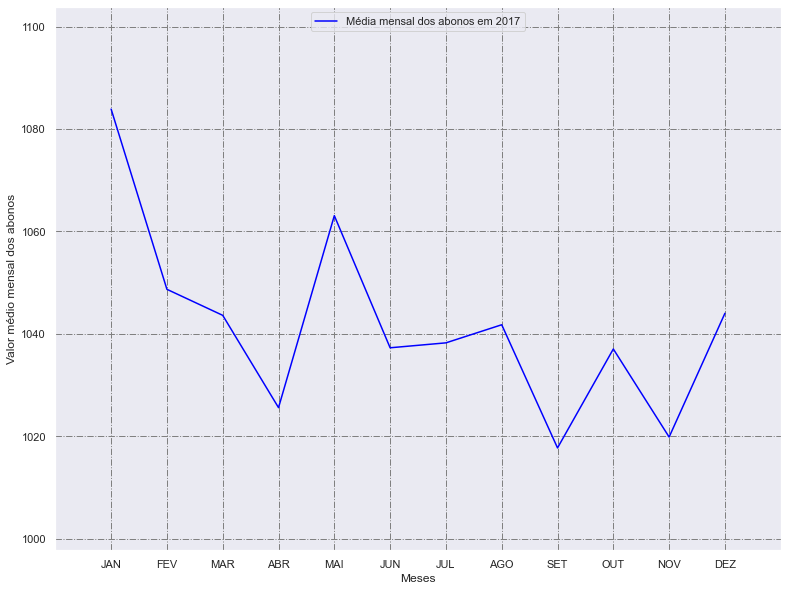

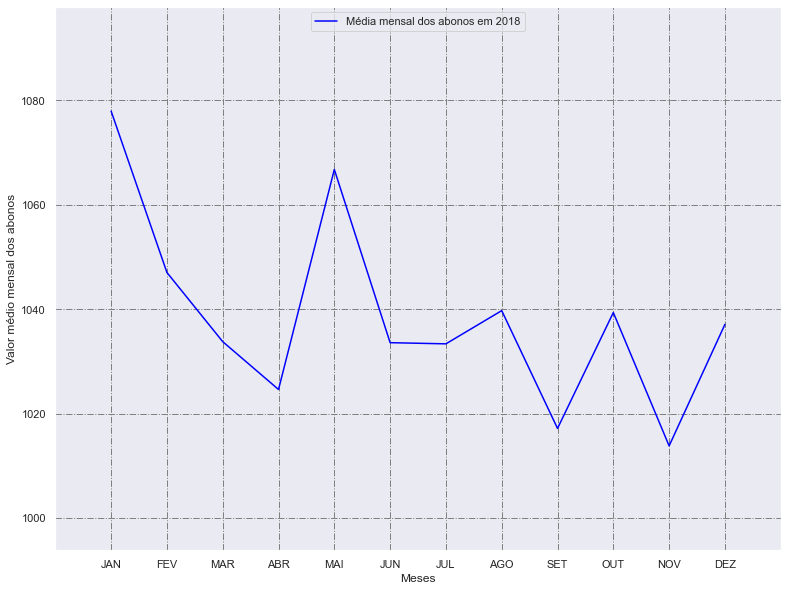

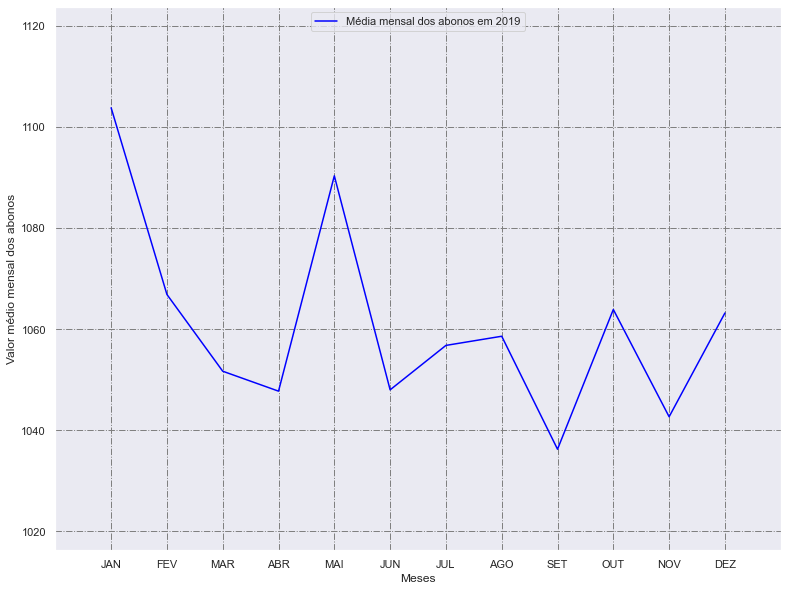

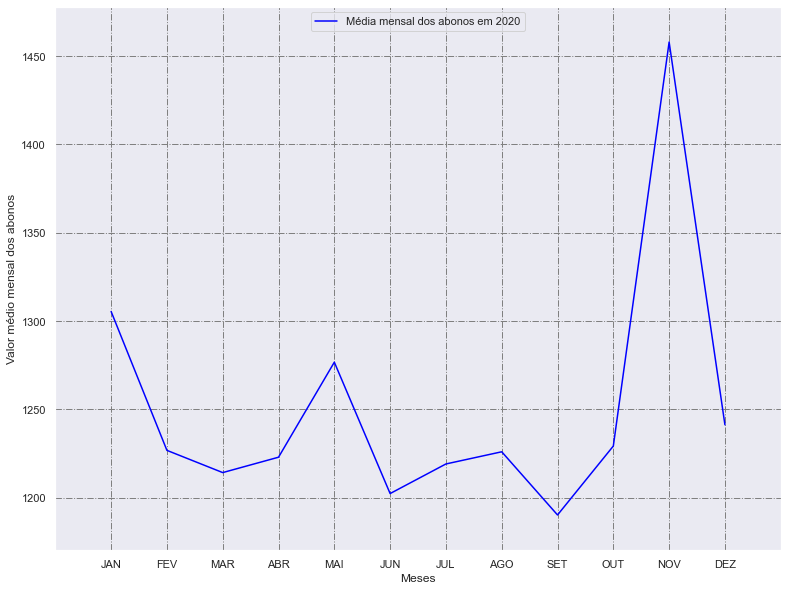

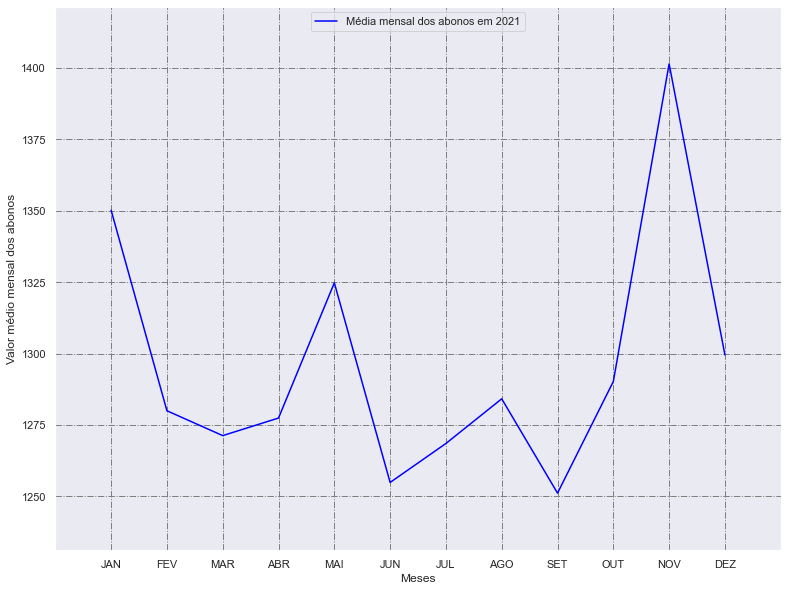

In [56]:
#Média dos anos anteriores a 2021
def media(df_ab, index):
    meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']
    meses_medias = list(df_ab.groupby('Mes').VAL.mean())

    fig = plt.figure(figsize=(13, 10))
    plt.plot(meses, meses_medias, color = 'blue')
    plt.ylim(min(meses_medias)-20, max(meses_medias)+20)
    plt.xlim(-1, 12)

    plt.rc('grid', linestyle="-.", color='gray')
    plt.grid(True)

    plt.xlabel('Meses')
    plt.ylabel('Valor médio mensal dos abonos')
    plt.legend(['Média mensal dos abonos em '+anos_ab[index]], loc=9)
    plt.show()
    fig_name = 'valor médio mensal dos abonos em {}'.format(anos_ab[i])
    fig.savefig(fig_name+'.png', format='png', dpi=100)
    return meses_medias
medias = []
for i in range(len(df_abonos)):
    medias.append(media(df_abonos[i], i))
#armazenando a média mensal de cada ano

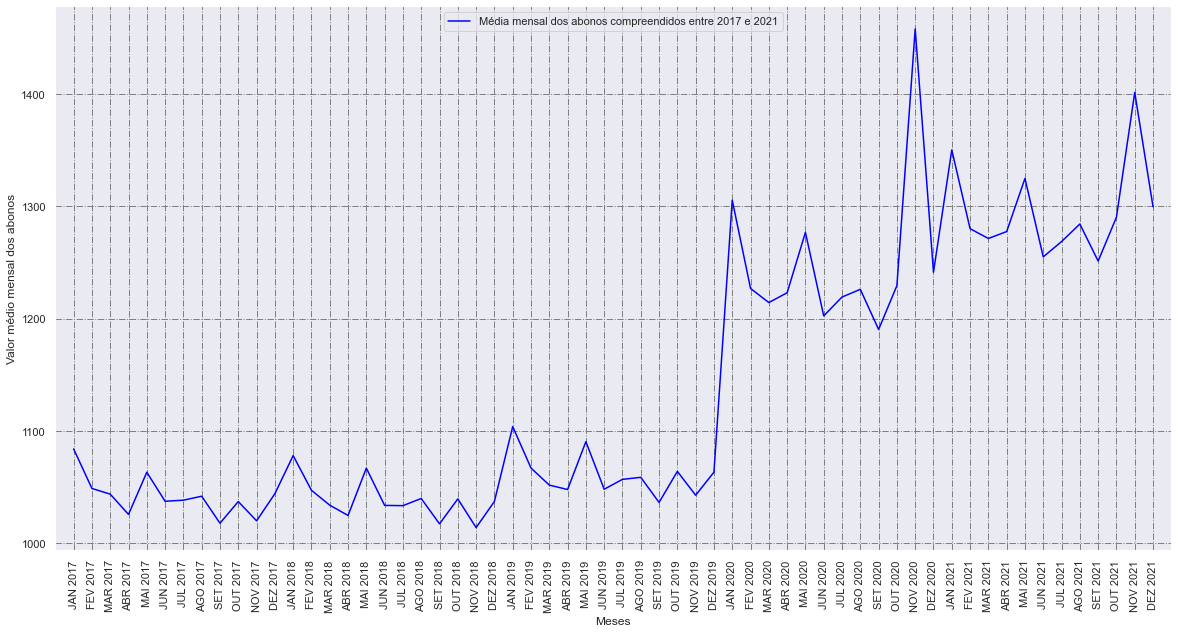

In [69]:
#Valor mensal de abonos em 2021
meses = []
for year in anos_ab:
    months_table = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']
    for month in months_table:
        meses.append(f'{month} {year}')

meses_medias = []
for df_abono in df_abonos:
    meses_medias += list(df_abono.groupby('Mes').VAL.mean())

fig = plt.figure(figsize=(20, 10))
plt.plot(meses, meses_medias, color = 'blue')
plt.xticks(rotation=90)
plt.ylim(min(meses_medias)-20, max(meses_medias)+20)
plt.xlim(-1, len(meses))

plt.rc('grid', linestyle="-.", color='gray')
plt.grid(True)

plt.xlabel('Meses')
plt.ylabel('Valor médio mensal dos abonos')
plt.legend(['Média mensal dos abonos compreendidos entre 2017 e 2021'], loc=9)
plt.show()

fig.savefig('valor médio mensal dos abonos em 2021.png', format='png', dpi=100)
#Colocando as medias de 2021 na lista
medias.append(meses_medias)

ValueError: x and y must have same first dimension, but have shapes (60,) and (12,)

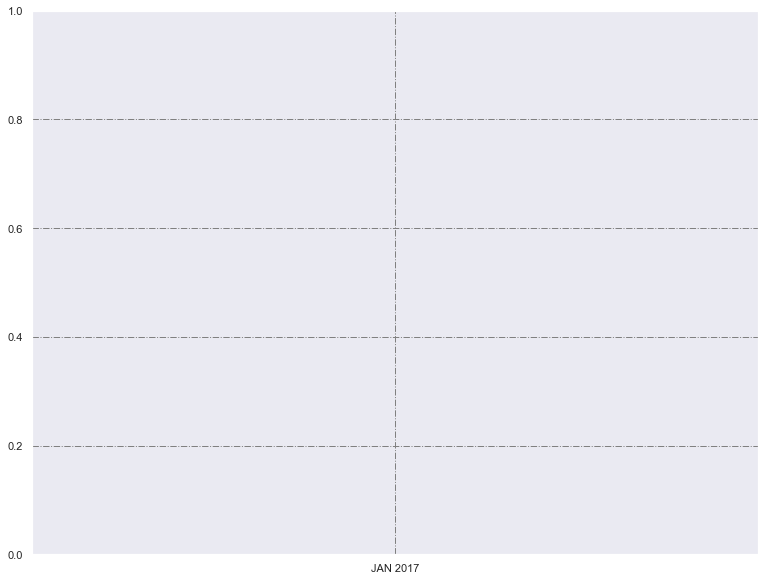

In [70]:
#Mediana mensal dos abonos em 2021
medianas = []
for df_abono in df_abonos:
    medianas += list(df_abono.groupby('Mes').VAL.median())

fig = plt.figure(figsize=(13, 10))
plt.plot(meses, medianas, color = 'blue')
plt.ylim(780,900)
plt.xlim(-1,12)

plt.rc('grid', linestyle="-.", color='gray')
plt.grid(True)

plt.xlabel('Meses')
plt.ylabel('Mediana mensal dos abonos')
plt.legend(['Mediana mensal dos abonos em 2021'], loc=9)
plt.show()

fig.savefig('Mediana mensal dos abonos em 2021.png', format='png', dpi=100)



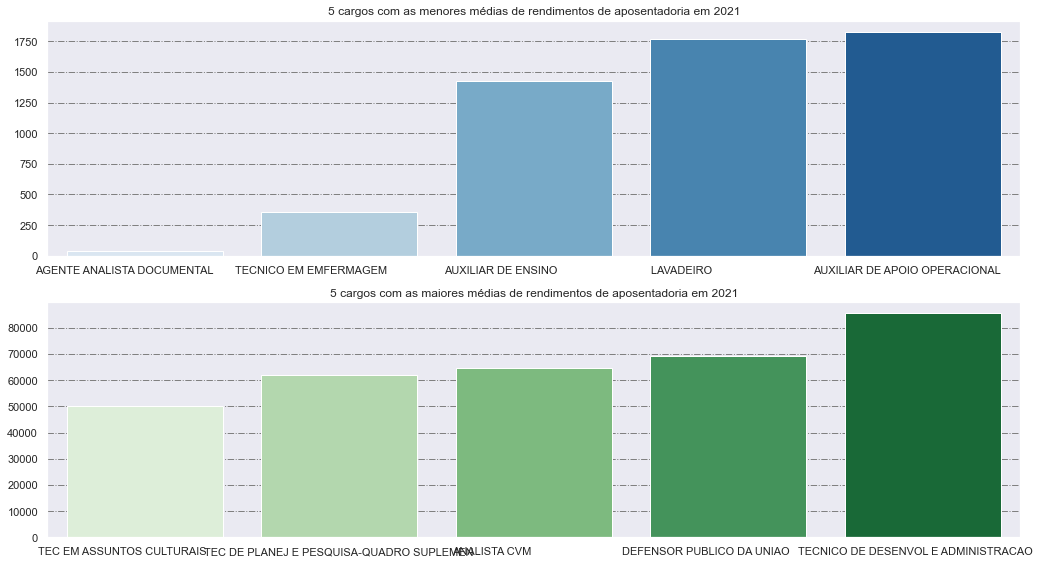

In [29]:
#Redimentos aposentadoria de acordo com o cargo
redimentos = pd.DataFrame(df_ap.groupby('Cargo').Rendimento_liq.mean().sort_values())
redimentos = redimentos.reset_index()

menores_rend = redimentos.iloc[0:5]
maiores_rend = redimentos.tail(5)

fig, ax = plt.subplots(2, figsize=(15,8))

x1 = list(menores_rend['Cargo'])
y1 = list(menores_rend['Rendimento_liq'])

sns.barplot(ax=ax[0], x=x1, y=y1, palette="Blues")
ax[0].set_title("5 cargos com as menores médias de rendimentos de aposentadoria em 2021")

x2 = list(maiores_rend['Cargo'])
y2 = list(maiores_rend['Rendimento_liq'])
sns.barplot(ax=ax[1], x=x2, y=y2, palette="Greens")
ax[1].set_title("5 cargos com as maiores médias de rendimentos de aposentadoria em 2021")

fig.tight_layout()
plt.savefig('Médias de rendimento por cargo')

c:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


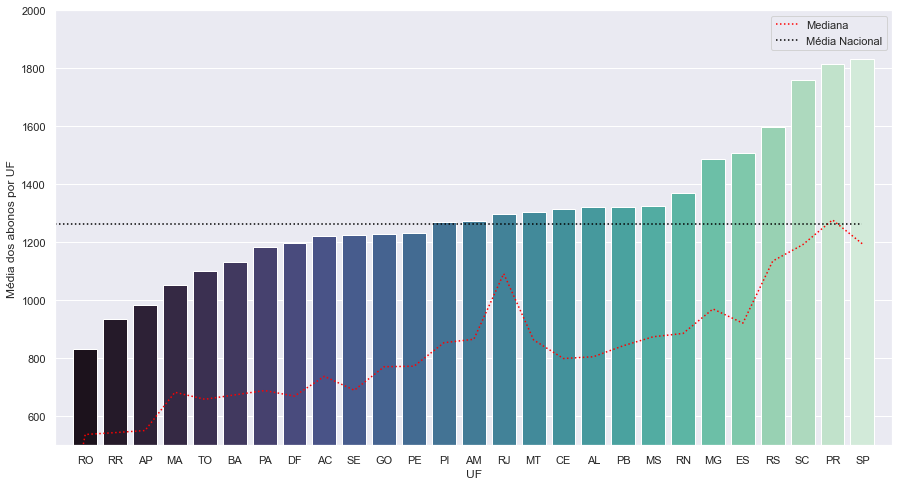

In [13]:
#Média e mediana de abonos por UF 

#Definindo a media e mediana
uf_m = pd.DataFrame(df_abono.groupby('UF').VAL.mean().sort_values())
uf_m['mediana'] = df_abono.groupby('UF').VAL.median().sort_values() 
uf_m['media'] = uf_m['VAL']
uf_m.reset_index(inplace=True)

uf_m.drop('VAL', axis=1 ,inplace=True)
uf_m.sort_values('UF')

media_nacional = uf_m['media'].mean()

#Definindo os eixos do gráfico
x_uf = list(uf_m['UF'])
y_mediana = list(uf_m['mediana'])
y_media = list(uf_m['media'])

#Construindo o gráfico
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(15,8))
sns.barplot(x_uf, y_media, palette="mako")
sns.lineplot(x=x_uf, y=y_mediana, linestyle=":",color="red", label='Mediana')
sns.lineplot(x=x_uf, y=media_nacional, linestyle=":",color="black", label='Média Nacional')
plt.ylim(500,2000)
plt.xlim(0, 28)
plt.xlabel('UF')
plt.ylabel('Média dos abonos por UF')
plt.show()

fig.tight_layout()
fig.savefig('Valor médio mensal dos abonos por estado.png', format='png',dpi=100)